# 1er intento de Examen 1 curso Machine Learning (MITIC-DS-A-Septiembre-2024) : House Prices Dataset SalePrice: Precio de venta (variable objetivo) 

In [ ]:
import pandas as pd
import numpy as np
import time
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import json
import re
import plotly.express as px
from IPython.display import HTML, Image
import utils_profe
from collections import Counter
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression


In [4]:
# Unifique los archivos test.csv y train.csv porque tienen una distribución mayor al 30%
path = '../../data/kaggle/house-price/dataset_completo.csv'
df = pd.read_csv(filepath_or_buffer=path, sep= ',', header=0)
print(df.shape)
df.info()

(2919, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 1

## Limpieza de datos con Python:

### **Verificación y ajuste de tipos de datos** 

Asegúrate de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.

In [5]:
df.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65.0,80.0,68.0,60.0,84.0
LotArea,8450,9600,11250,9550,14260
...,...,...,...,...,...
MoSold,2,5,9,2,12
YrSold,2008,2007,2008,2006,2008
SaleType,WD,WD,WD,WD,WD
SaleCondition,Normal,Normal,Normal,Abnorml,Normal


In [6]:
# Detectar columnas con valores únicos ['Yes', 'No']
yes_no_columns = [col for col in df.columns if sorted(df[col].dropna().unique()) == ['No', 'Yes']]
print("Columnas con valores 'Yes' y 'No':", yes_no_columns)
# Aplicar el mapeo 'Yes' -> 1 y 'No' -> 0 a todas las columnas de una vez usando map y itertools
df[yes_no_columns] = pd.DataFrame(
    map(lambda col: df[col].map({'Yes': 1, 'No': 0}), yes_no_columns)
).T.set_axis(yes_no_columns, axis=1)

Columnas con valores 'Yes' y 'No': []


In [7]:
# Convertir a primitivas todas las columnas del dataframe
utils_profe.generar_diccionario(df)

data_dict = {
    'Id': 'int64',
    'MSSubClass': 'int64',
    'MSZoning': 'object',
    'LotFrontage': 'float64',
    'LotArea': 'int64',
    'Street': 'object',
    'Alley': 'object',
    'LotShape': 'object',
    'LandContour': 'object',
    'Utilities': 'object',
    'LotConfig': 'object',
    'LandSlope': 'object',
    'Neighborhood': 'object',
    'Condition1': 'object',
    'Condition2': 'object',
    'BldgType': 'object',
    'HouseStyle': 'object',
    'OverallQual': 'int64',
    'OverallCond': 'int64',
    'YearBuilt': 'int64',
    'YearRemodAdd': 'int64',
    'RoofStyle': 'object',
    'RoofMatl': 'object',
    'Exterior1st': 'object',
    'Exterior2nd': 'object',
    'MasVnrType': 'object',
    'MasVnrArea': 'float64',
    'ExterQual': 'object',
    'ExterCond': 'object',
    'Foundation': 'object',
    'BsmtQual': 'object',
    'BsmtCond': 'object',
    'BsmtExposure': 'object',
    'BsmtFinType1': 'object',
    'BsmtFinSF1': 'float64',
    'BsmtFinType2': 'object',
    '

In [8]:
data_dict = {
    'Id': 'int64',
    'MSSubClass': 'int64',
    'MSZoning': 'category',
    'LotFrontage': 'float64',
    'LotArea': 'int64',
    'Street': 'category',
    'Alley': 'category',
    'LotShape': 'category',
    'LandContour': 'category',
    'Utilities': 'category',
    'LotConfig': 'category',
    'LandSlope': 'category',
    'Neighborhood': 'category',
    'Condition1': 'category',
    'Condition2': 'category',
    'BldgType': 'category',
    'HouseStyle': 'category',
    'OverallQual': 'int64',
    'OverallCond': 'int64',
    'YearBuilt': 'int64',
    'YearRemodAdd': 'int64',
    'RoofStyle': 'category',
    'RoofMatl': 'category',
    'Exterior1st': 'category',
    'Exterior2nd': 'category',
    'MasVnrType': 'category',
    'MasVnrArea': 'float64',
    'ExterQual': 'category',
    'ExterCond': 'category',
    'Foundation': 'category',
    'BsmtQual': 'category',
    'BsmtCond': 'category',
    'BsmtExposure': 'category',
    'BsmtFinType1': 'category',
    'BsmtFinSF1': 'float64',
    'BsmtFinType2': 'category',
    'BsmtFinSF2': 'float64',
    'BsmtUnfSF': 'float64',
    'TotalBsmtSF': 'float64',
    'Heating': 'category',
    'HeatingQC': 'category',
    'CentralAir': 'category',
    'Electrical': 'category',
    '1stFlrSF': 'int64',
    '2ndFlrSF': 'int64',
    'LowQualFinSF': 'int64',
    'GrLivArea': 'int64',
    'BsmtFullBath': 'float64',
    'BsmtHalfBath': 'float64',
    'FullBath': 'int64',
    'HalfBath': 'int64',
    'BedroomAbvGr': 'int64',
    'KitchenAbvGr': 'int64',
    'KitchenQual': 'category',
    'TotRmsAbvGrd': 'int64',
    'Functional': 'category',
    'Fireplaces': 'int64',
    'FireplaceQu': 'category',
    'GarageType': 'category',
    'GarageYrBlt': 'float64',
    'GarageFinish': 'category',
    'GarageCars': 'float64',
    'GarageArea': 'float64',
    'GarageQual': 'category',
    'GarageCond': 'category',
    'PavedDrive': 'category',
    'WoodDeckSF': 'int64',
    'OpenPorchSF': 'int64',
    'EnclosedPorch': 'int64',
    '3SsnPorch': 'int64',
    'ScreenPorch': 'int64',
    'PoolArea': 'int64',
    'PoolQC': 'category',
    'Fence': 'category',
    'MiscFeature': 'category',
    'MiscVal': 'int64',
    'MoSold': 'int64',
    'YrSold': 'int64',
    'SaleType': 'category',
    'SaleCondition': 'category',
    'SalePrice': 'float64',
}

# Convertir tipos de datos según el diccionario
for column, dtype in data_dict.items():
    df[column] = df[column].astype(dtype, errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             2919 non-null   int64   
 1   MSSubClass     2919 non-null   int64   
 2   MSZoning       2915 non-null   category
 3   LotFrontage    2433 non-null   float64 
 4   LotArea        2919 non-null   int64   
 5   Street         2919 non-null   category
 6   Alley          198 non-null    category
 7   LotShape       2919 non-null   category
 8   LandContour    2919 non-null   category
 9   Utilities      2917 non-null   category
 10  LotConfig      2919 non-null   category
 11  LandSlope      2919 non-null   category
 12  Neighborhood   2919 non-null   category
 13  Condition1     2919 non-null   category
 14  Condition2     2919 non-null   category
 15  BldgType       2919 non-null   category
 16  HouseStyle     2919 non-null   category
 17  OverallQual    2919 non-null   in

### **Detección y eliminación de valores duplicados** 

Asegúrate de que cada registro en el dataset sea único

In [9]:
# Identificar duplicados
duplicados = df.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")

Número de registros duplicados: 0


### **Consistencia en valores categóricos**

Identifica y corrige cualquier inconsistencia en los valores categóricos (por ejemplo, ‘Junior’, ‘junior’, ‘JUNIOR’)

In [10]:
# Identificar columnas de tipo 'object', típicamente usadas para variables categóricas
categorical_columns = df.select_dtypes(include=['category','bool']).columns
# Crear un diccionario donde cada clave es el nombre de la columna y los valores son los valores únicos de esa columna
unique_values_dict = {col: df[col].unique() for col in categorical_columns}
# Convertir el diccionario en un DataFrame, rellenando con NaN cuando haya menos valores únicos
unique_values_df = pd.DataFrame.from_dict(unique_values_dict, orient='index').transpose()
# Mostrar el DataFrame resultante
unique_values_df.T



,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
MSZoning,RL,RM,C (all),FV,RH,NaN,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Street,Pave,Grvl,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Alley,NaN,Grvl,Pave,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
LotShape,Reg,IR1,IR2,IR3,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
LandContour,Lvl,Bnk,Low,HLS,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Utilities,AllPub,NoSeWa,NaN,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
LotConfig,Inside,FR2,Corner,CulDSac,FR3,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
LandSlope,Gtl,Mod,Sev,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Neighborhood,CollgCr,Veenker,Crawfor,NoRidge,Mitchel,Somerst,NWAmes,OldTown,BrkSide,Sawyer,...,Edwards,Timber,Gilbert,StoneBr,ClearCr,NPkVill,Blmngtn,BrDale,SWISU,Blueste
Condition1,Norm,Feedr,PosN,Artery,RRAe,RRNn,RRAn,PosA,RRNe,None,...,None,None,None,None,None,None,None,None,None,None


In [11]:
# He encontrado vecindario, tiene 25 vecindarios. Voy a excluirlos para analizar mejor los datos de las demas categorias
# Exterior1st y Exterior2nd son iguales, voy a excluir ambas para analizar mejor los datos de las demas categorias
df['Neighborhood'].unique()

['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', ..., 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU', 'Blueste']
Length: 25
Categories (25, object): ['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', ..., 'Somerst', 'StoneBr', 'Timber', 'Veenker']

In [12]:
df_no_neighborhood = df.drop(['Neighborhood','Exterior1st','Exterior2nd'], axis=1)

In [13]:
# Identificar columnas de tipo 'object', típicamente usadas para variables categóricas
categorical_columns = df_no_neighborhood.select_dtypes(include=['category','bool']).columns
# Crear un diccionario donde cada clave es el nombre de la columna y los valores son los valores únicos de esa columna
unique_values_dict = {col: df[col].unique() for col in categorical_columns}
# Convertir el diccionario en un DataFrame, rellenando con NaN cuando haya menos valores únicos
unique_values_df = pd.DataFrame.from_dict(unique_values_dict, orient='index').transpose()
# Mostrar el DataFrame resultante
unique_values_df.T

,0,1,2,3,4,5,6,7,8,9
MSZoning,RL,RM,C (all),FV,RH,NaN,None,None,None,NaN
Street,Pave,Grvl,None,None,None,None,None,None,None,NaN
Alley,NaN,Grvl,Pave,None,None,None,None,None,None,NaN
LotShape,Reg,IR1,IR2,IR3,None,None,None,None,None,NaN
LandContour,Lvl,Bnk,Low,HLS,None,None,None,None,None,NaN
Utilities,AllPub,NoSeWa,NaN,None,None,None,None,None,None,NaN
LotConfig,Inside,FR2,Corner,CulDSac,FR3,None,None,None,None,NaN
LandSlope,Gtl,Mod,Sev,None,None,None,None,None,None,NaN
Condition1,Norm,Feedr,PosN,Artery,RRAe,RRNn,RRAn,PosA,RRNe,NaN
Condition2,Norm,Artery,RRNn,Feedr,PosN,PosA,RRAn,RRAe,None,NaN


### **Manejo de valores faltantes:**

Identifica y maneja cualquier valor faltante en el dataset. Rellena los valores faltantes con un marcador adecuado para el tipo de dato

In [14]:
print(utils_profe.calculate_na_statistics(df))

               datos sin NAs en q  Na en q  Na en %
PoolQC                         10     2909    99.66
MiscFeature                   105     2814    96.40
Alley                         198     2721    93.22
Fence                         571     2348    80.44
MasVnrType                   1153     1766    60.50
...                           ...      ...      ...
EnclosedPorch                2919        0     0.00
MoSold                       2919        0     0.00
MiscVal                      2919        0     0.00
YrSold                       2919        0     0.00
SaleCondition                2919        0     0.00

[81 rows x 3 columns]


In [15]:
# Voy a eliminar las columnas con mas de 20% de nulos
# df.dropna(axis=1, thresh=df.shape[0] * 0.8, inplace=True)
# Obtén todas las columnas excepto 'SalePrice'
# Excluir 'SalePrice' y obtener las columnas restantes
# Excluir la columna 'SalePrice' de la lista de columnas a revisar
# Itera sobre todas las columnas del DataFrame
for col in df.columns:
    # Excluir la columna 'SalePrice'
    if col != 'SalePrice':
        # Verificar si la columna tiene más del 20% de nulos
        if df[col].isnull().mean() > 0.2:
            # Eliminar la columna si tiene más del 20% de nulos
            df.drop(columns=[col], inplace=True)

# Verifica los resultados
print(df.head())




   Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    AllPub    Inside  ...             0         0           0        0   
1    AllPub       FR2  ...             0         0           0        0   
2    AllPub    Inside  ...             0         0           0        0   
3    AllPub    Corner  ...           272         0           0        0   
4    AllPub       FR2  ...             0         0           0        0   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0    

In [16]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [17]:
print(utils_profe.calculate_na_statistics(df))

               datos sin NAs en q  Na en q  Na en %
SalePrice                    1460     1459    49.98
LotFrontage                  2433      486    16.65
GarageFinish                 2760      159     5.45
GarageQual                   2760      159     5.45
GarageYrBlt                  2760      159     5.45
...                           ...      ...      ...
PoolArea                     2919        0     0.00
MoSold                       2919        0     0.00
MiscVal                      2919        0     0.00
YrSold                       2919        0     0.00
SaleCondition                2919        0     0.00

[75 rows x 3 columns]


In [18]:
df['LotFrontage'].describe()

count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

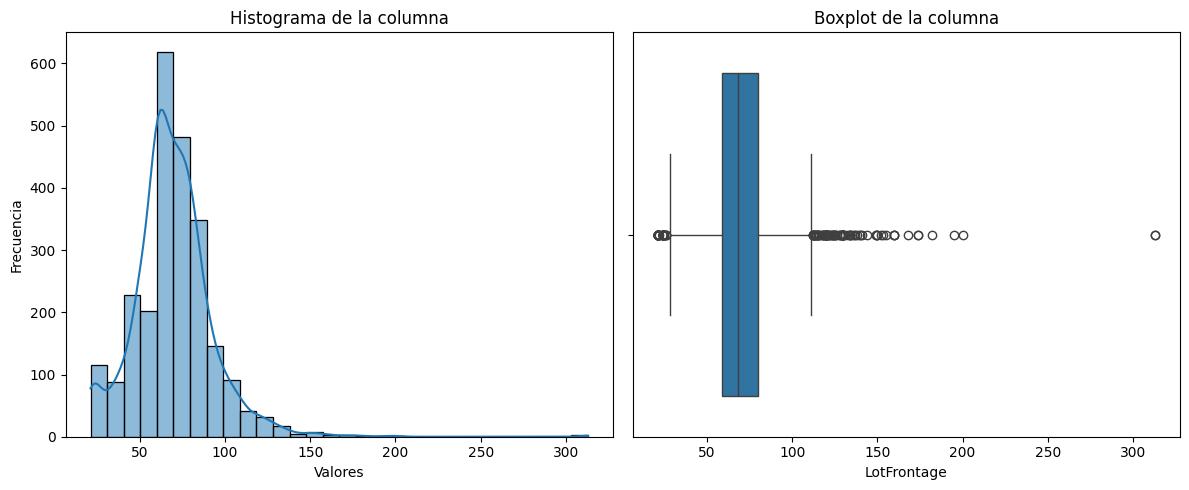

In [19]:
# Histograma
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df['LotFrontage'], kde=True, bins=30)
plt.title('Histograma de la columna')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['LotFrontage'])
plt.title('Boxplot de la columna')

plt.tight_layout()
plt.show()


In [20]:
# Reemplazar los valores nulos en todo el DataFrame con la media de cada columna
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)



C:\Users\edgar\AppData\Local\Temp\ipykernel_11664\1438684524.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)


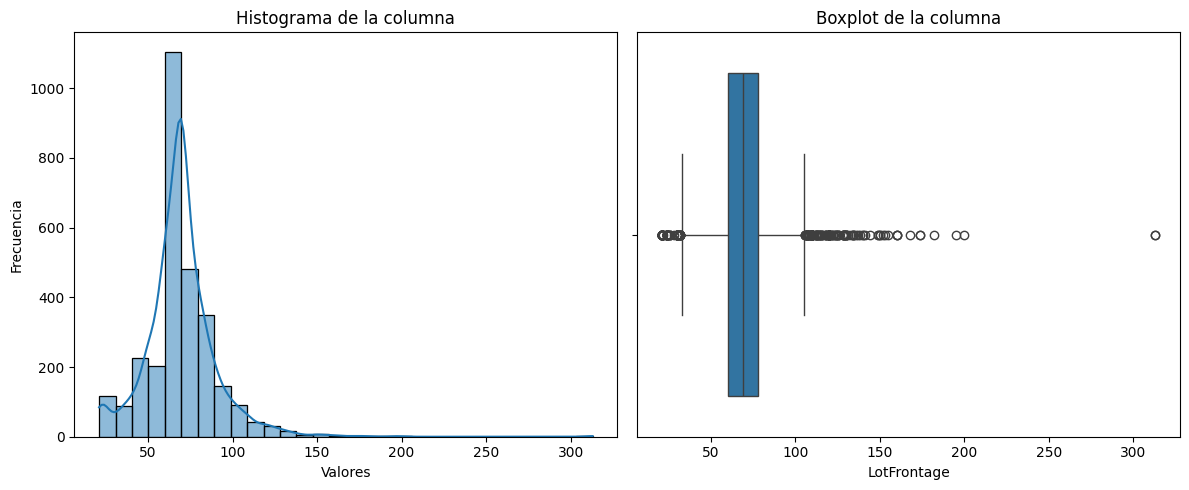

In [21]:
# Histograma
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df['LotFrontage'], kde=True, bins=30)
plt.title('Histograma de la columna')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['LotFrontage'])
plt.title('Boxplot de la columna')

plt.tight_layout()
plt.show()


In [22]:
df['LotFrontage'].describe()

count    2919.000000
mean       69.305795
std        21.312345
min        21.000000
25%        60.000000
50%        69.305795
75%        78.000000
max       313.000000
Name: LotFrontage, dtype: float64

# Cambio de 60 a 70, está dentro de la desviación standar original y no es mucho.

In [23]:
df['GarageCond'].describe()

count     2760
unique       5
top         TA
freq      2654
Name: GarageCond, dtype: object

In [23]:
df['GarageCond'].unique()

['TA', 'Fa', NaN, 'Gd', 'Po', 'Ex']
Categories (5, object): ['Ex', 'Fa', 'Gd', 'Po', 'TA']

In [24]:
# Voy a aplicarle el mas frecuente.
df['GarageCond'].fillna('TA', inplace=True)

C:\Users\edgar\AppData\Local\Temp\ipykernel_24244\189533618.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageCond'].fillna('TA', inplace=True)


In [25]:
df['GarageFinish'].describe()

count     2760
unique       3
top        Unf
freq      1230
Name: GarageFinish, dtype: object

In [26]:
df['GarageYrBlt'].describe()

count    2760.000000
mean     1978.113406
std        25.574285
min      1895.000000
25%      1960.000000
50%      1979.000000
75%      2002.000000
max      2207.000000
Name: GarageYrBlt, dtype: float64

In [27]:
df['GarageQual'].describe()

count     2760
unique       5
top         TA
freq      2604
Name: GarageQual, dtype: object

In [24]:
# Tambien para GarageFinish,GarageYrBlt y GarageQual
df['GarageFinish'].fillna('Unf', inplace=True)
df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean(), inplace=True)
df['GarageQual'].fillna('TA', inplace=True) 

C:\Users\edgar\AppData\Local\Temp\ipykernel_11664\890200976.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageFinish'].fillna('Unf', inplace=True)
C:\Users\edgar\AppData\Local\Temp\ipykernel_11664\890200976.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [25]:
utils_profe.calculate_na_statistics(df)

,datos sin NAs en q,Na en q,Na en %
SalePrice,1460,1459,49.98
GarageCond,2760,159,5.45
GarageType,2762,157,5.38
BsmtCond,2837,82,2.81
BsmtExposure,2837,82,2.81
...,...,...,...
PoolArea,2919,0,0.00
MoSold,2919,0,0.00
MiscVal,2919,0,0.00
YrSold,2919,0,0.00


In [26]:
# Itera por todas las columnas de tipo 'object' (categóricas)
for col in df.select_dtypes(include=['category']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Imprime las primeras filas del DataFrame resultante
print(df.head())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    AllPub    Inside  ...             0         0           0        0   
1    AllPub       FR2  ...             0         0           0        0   
2    AllPub    Inside  ...             0         0           0        0   
3    AllPub    Corner  ...           272         0           0        0   
4    AllPub       FR2  ...             0         0           0        0   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0    

C:\Users\edgar\AppData\Local\Temp\ipykernel_11664\1752937860.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [27]:
utils_profe.calculate_na_statistics(df)

,datos sin NAs en q,Na en q,Na en %
SalePrice,1460,1459,49.98
MasVnrArea,2896,23,0.79
BsmtHalfBath,2917,2,0.07
BsmtFullBath,2917,2,0.07
BsmtFinSF1,2918,1,0.03
...,...,...,...
PoolArea,2919,0,0.00
MoSold,2919,0,0.00
YrSold,2919,0,0.00
SaleType,2919,0,0.00


In [28]:
# Itera por todas las columnas de tipo numérico, EXCEPTO SalePrice
for col in df.select_dtypes(include=['number']).columns:
    # Excluir la columna 'SalePrice' para que no se llene con la media
    if col != 'SalePrice':
        df[col].fillna(df[col].mean(), inplace=True)


# Imprime las primeras filas del DataFrame resultante
print(df.head())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    AllPub    Inside  ...             0         0           0        0   
1    AllPub       FR2  ...             0         0           0        0   
2    AllPub    Inside  ...             0         0           0        0   
3    AllPub    Corner  ...           272         0           0        0   
4    AllPub       FR2  ...             0         0           0        0   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0    

C:\Users\edgar\AppData\Local\Temp\ipykernel_11664\3715700194.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [29]:
utils_profe.calculate_na_statistics(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             2919 non-null   int64   
 1   MSSubClass     2919 non-null   int64   
 2   MSZoning       2919 non-null   category
 3   LotFrontage    2919 non-null   float64 
 4   LotArea        2919 non-null   int64   
 5   Street         2919 non-null   category
 6   LotShape       2919 non-null   category
 7   LandContour    2919 non-null   category
 8   Utilities      2919 non-null   category
 9   LotConfig      2919 non-null   category
 10  LandSlope      2919 non-null   category
 11  Neighborhood   2919 non-null   category
 12  Condition1     2919 non-null   category
 13  Condition2     2919 non-null   category
 14  BldgType       2919 non-null   category
 15  HouseStyle     2919 non-null   category
 16  OverallQual    2919 non-null   int64   
 17  OverallCond    2919 non-null   in

# Ya no tengo nulos y no he perdido registros. 

Lo que sí perdí es mucho tiempo

### **Detección de datos anómalos:**

Identifica y corrige cualquier punto de dato inapropiado o inusual (por ejemplo, un salario anual de 1 millón de dólares para un puesto de entrada).

In [30]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
# Create a summary DataFrame for outliers
outliers_summary = pd.DataFrame()
for column in numerical_columns:
    outliers = utils_profe.detect_outliers_iqr(df[column])
    outliers_summary[column] = {
        'Number of Outliers': outliers.sum(),
        'Percentage of Outliers': 100 * outliers.mean(),
        'Lower Bound': df[column][~outliers].min(),
        'Upper Bound': df[column][~outliers].max()
    }

# Save the summary to a CSV file
outliers_summary.T

,Number of Outliers,Percentage of Outliers,Lower Bound,Upper Bound
Id,0.0,0.000000,1.0,2919.0
MSSubClass,207.0,7.091470,20.0,120.0
LotFrontage,260.0,8.907160,33.0,105.0
LotArea,128.0,4.385063,1470.0,17671.0
OverallQual,4.0,0.137033,2.0,10.0
OverallCond,252.0,8.633094,4.0,7.0
YearBuilt,9.0,0.308325,1885.0,2010.0
YearRemodAdd,0.0,0.000000,1950.0,2010.0
MasVnrArea,202.0,6.920178,0.0,408.0
BsmtFinSF1,15.0,0.513875,0.0,1812.0


In [31]:
df[numerical_columns].describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,21.312345,7886.996359,1.409947,1.113131,30.291442,20.894344,178.626089,455.532750,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,60.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,69.305795,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,369.000000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,78.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,163.500000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [32]:
df['GarageArea'].describe()

count    2919.000000
mean      472.874572
std       215.357904
min         0.000000
25%       320.000000
50%       480.000000
75%       576.000000
max      1488.000000
Name: GarageArea, dtype: float64

# Voy a separar los que no tienen precio como mis datos a predecir.
# Los que tienen precio serán para mi entrenamiento y test.

In [33]:
# Resguardar el DataFrame original
df_original = df.copy()

In [34]:
# Filtrar los registros donde 'SalePrice' es nulo
df_predecir = df[df['SalePrice'].isnull()]
# Filtrar los registros donde 'SalePrice' no es nulo (esto sería el resto del DataFrame)
df = df[df['SalePrice'].notnull()]

In [35]:
print(f'Datos a Predicir    :{df_predecir.shape}')
print(f'Datos Entrenamiento :{df.shape}')
print(f'Datos Originales    :{df_original.shape}')

Datos a Predicir    :(1459, 75)
Datos Entrenamiento :(1460, 75)
Datos Originales    :(2919, 75)


In [ ]:
# Me parecen que tener o no tener garage y pool puede ser un buen predictor.
# Pero he visto que las areas de estos si tienen relacion.
# Si tuviera mas tiempo, lo veria con mas detenemiento para entender mi error o entender que pasa.
df_predecir['HasGarage'] = df_predecir['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df_predecir['HasPool'] = df_predecir['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

df['HasGarage'] = df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df['HasPool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

## **Exploración de datos con Python**

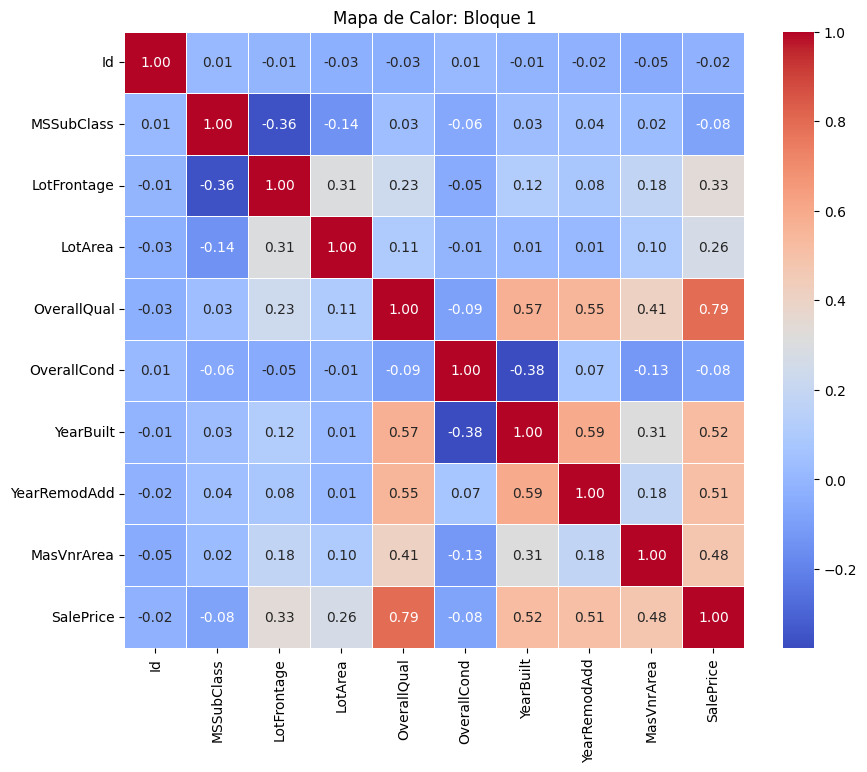

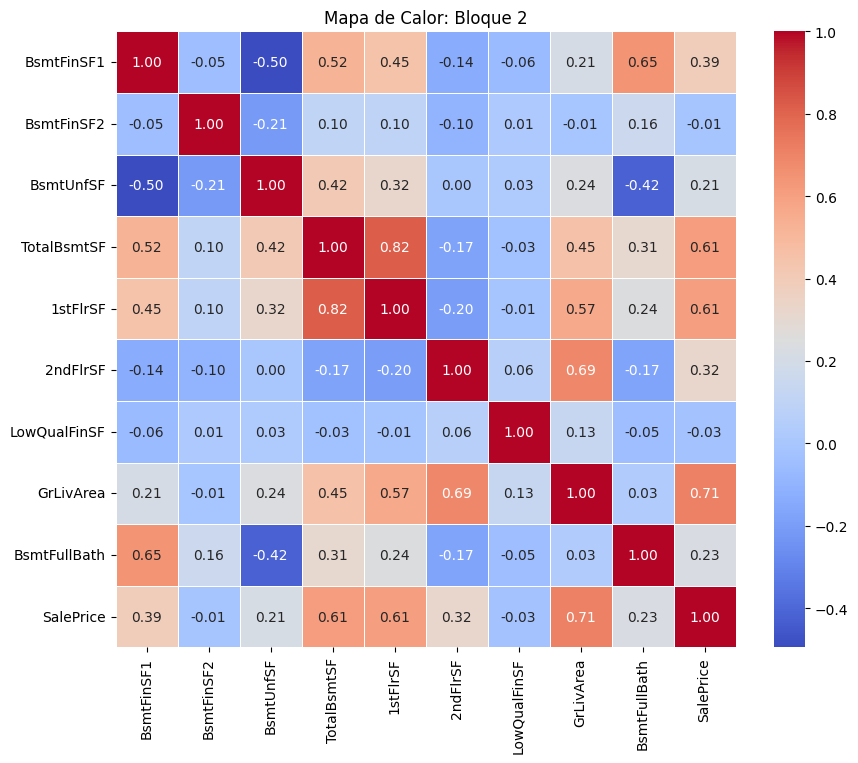

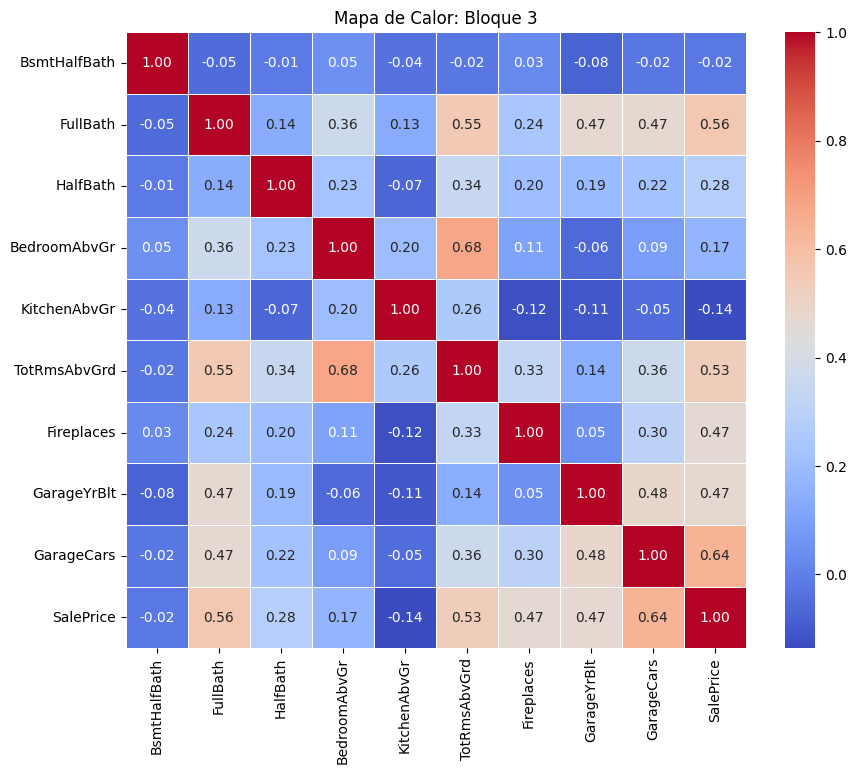

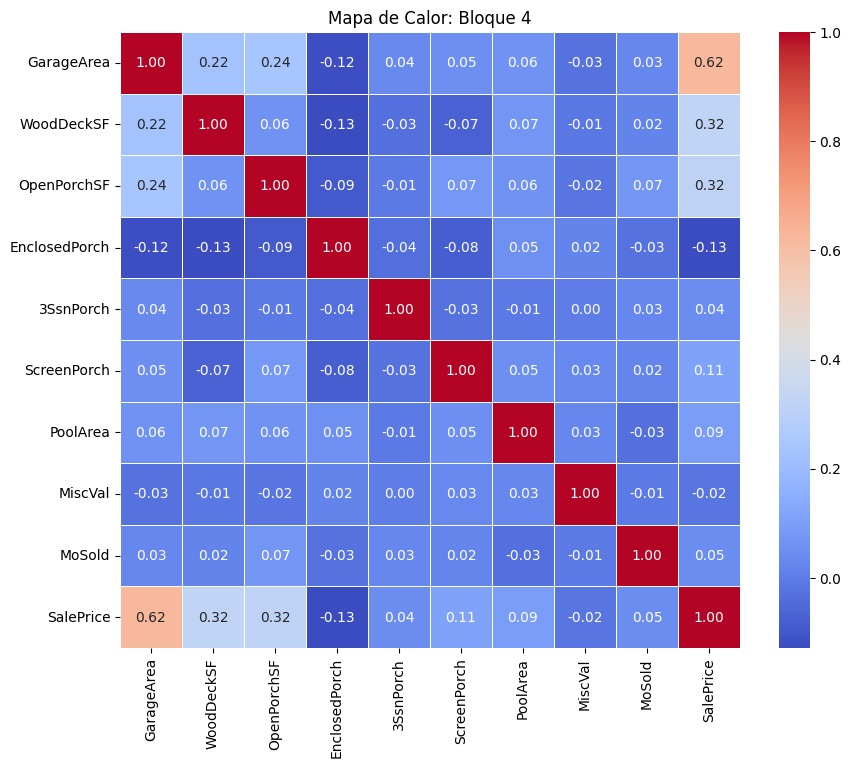

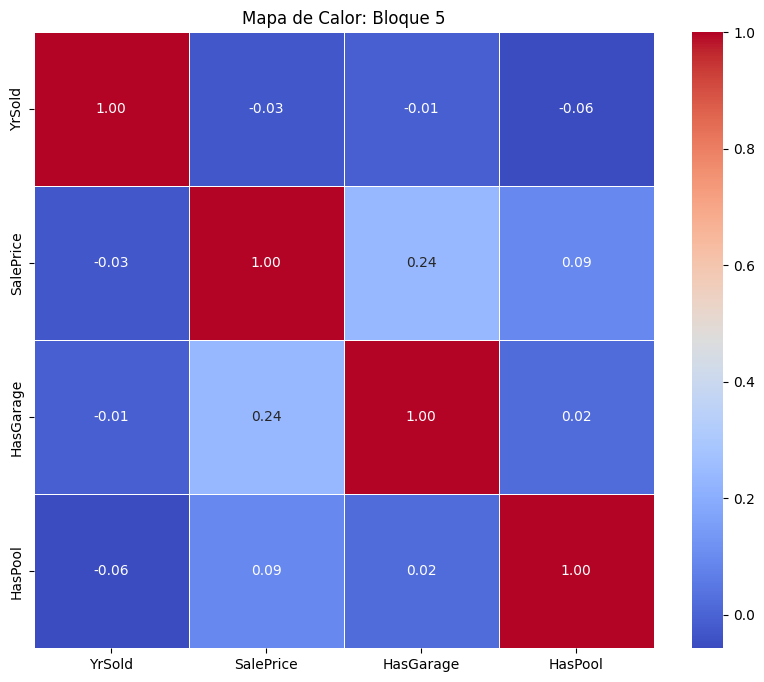


Resumen de Correlaciones con valor absoluto mayor a 0.49:
    Bloque     Columna 1     Columna 2  Correlación
0        1   OverallQual     YearBuilt     0.572323
1        1   OverallQual  YearRemodAdd     0.550684
2        1   OverallQual     SalePrice     0.790982
3        1     YearBuilt   OverallQual     0.572323
4        1     YearBuilt  YearRemodAdd     0.592855
5        1     YearBuilt     SalePrice     0.522897
6        1  YearRemodAdd   OverallQual     0.550684
7        1  YearRemodAdd     YearBuilt     0.592855
8        1  YearRemodAdd     SalePrice     0.507101
9        1     SalePrice   OverallQual     0.790982
10       1     SalePrice     YearBuilt     0.522897
11       1     SalePrice  YearRemodAdd     0.507101
12       2    BsmtFinSF1     BsmtUnfSF    -0.495251
13       2    BsmtFinSF1   TotalBsmtSF     0.522396
14       2    BsmtFinSF1  BsmtFullBath     0.649212
15       2     BsmtUnfSF    BsmtFinSF1    -0.495251
16       2   TotalBsmtSF    BsmtFinSF1     0.522396
17   

In [48]:
# Lista de columnas numéricas
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

# Asegúrate de que 'SalePrice' esté en la lista de columnas numéricas
if 'SalePrice' not in numeric_columns:
    numeric_columns.append('SalePrice')

# Dividir las columnas numéricas en bloques de 9, asegurando que 'SalePrice' esté en todos los bloques
chunks = []

# Iterar sobre las columnas numéricas y hacer bloques de 9
for i in range(0, len(numeric_columns), 9):
    chunk = numeric_columns[i:i + 9]
    # Asegurar que 'SalePrice' esté en el bloque
    if 'SalePrice' not in chunk:
        chunk.append('SalePrice')
    chunks.append(chunk)

# Lista para almacenar los resúmenes de las correlaciones
correlations_summary = []

# Crear los mapas de calor por cada bloque
for i, chunk in enumerate(chunks):
    # Filtrar el DataFrame con las columnas del bloque
    chunk_df = df[chunk]
    
    # Calcular la correlación entre las variables en el bloque
    corr_matrix = chunk_df.corr()
    
    # Crear el mapa de calor
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title(f'Mapa de Calor: Bloque {i + 1}')
    plt.show()

    # Filtrar las correlaciones cuya magnitud sea mayor a 0.49
    for col1 in corr_matrix.columns:
        for col2 in corr_matrix.index:
            if col1 != col2 and abs(corr_matrix.loc[col2, col1]) > 0.49:
                correlations_summary.append({
                    'Bloque': i + 1,
                    'Columna 1': col1,
                    'Columna 2': col2,
                    'Correlación': corr_matrix.loc[col2, col1]
                })

# Crear un DataFrame con el resumen de correlaciones
correlations_df = pd.DataFrame(correlations_summary)

# Mostrar el resumen de correlaciones
if not correlations_df.empty:
    print("\nResumen de Correlaciones con valor absoluto mayor a 0.49:")
    print(correlations_df)
else:
    print("\nNo se encontraron correlaciones con valor absoluto mayor a 0.49.")

Seleccione las que mayor correlación tienen.

In [ ]:
columnas_seleccionadas = ['OverallQual','GrLivArea','YearBuilt','YearRemodAdd','TotalBsmtSF','GarageCars']
     #numeric_features = ['OverallQual','GrLivArea','YearBuilt','YearRemodAdd','TotalBsmtSF','GarageCars']

### **Visualizaciones exploratorias univariadas**

Crea dos tipos diferentes de visualizaciones univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código

In [ ]:
print(df.groupby(['SalePrice'])[columnas_seleccionadas].describe().T)
# Configuración del tamaño de la gráfica
plt.figure(figsize=(7.5, 5 * len(columnas_seleccionadas)))
# Crear un boxplot para cada columna numérica segmentada por 'Churn'
for i, column in enumerate(columnas_seleccionadas, 1):
    plt.subplot(len(columnas_seleccionadas), 1, i)
    sns.boxplot(x='SalePrice', y=column, data=df)
    plt.title(f'Boxplot de {column} por SalePrice')
    plt.xlabel('SalePrice')
    plt.ylabel(column)
plt.tight_layout()
plt.show()

* Transformación de variables categóricas.
* División del conjunto de datos en entrenamiento y prueba.
* Escalado de características.

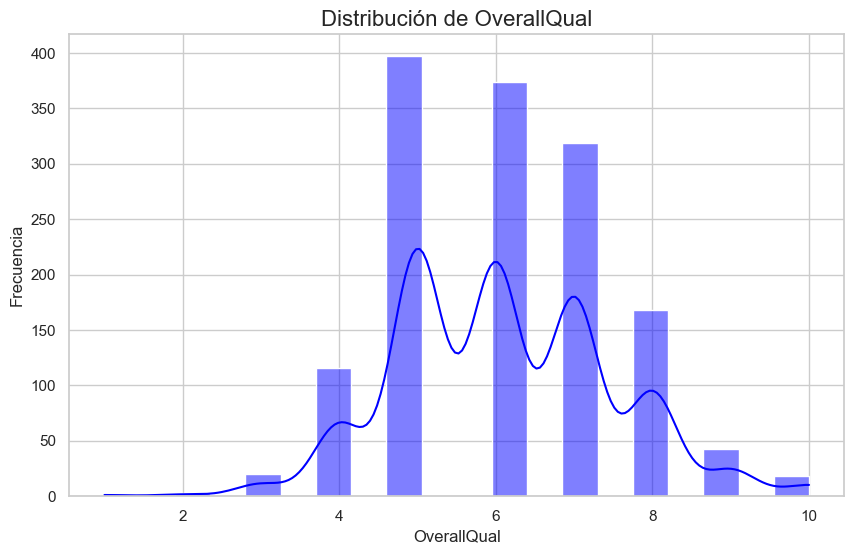

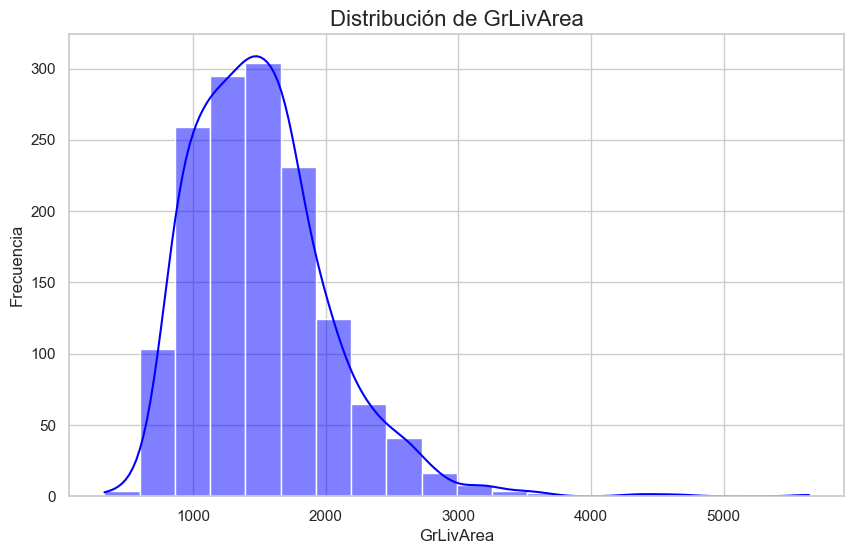

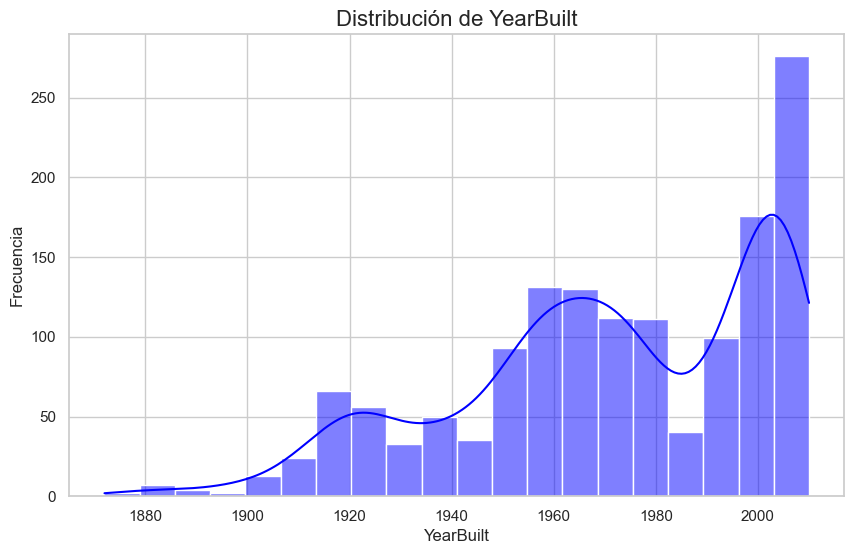

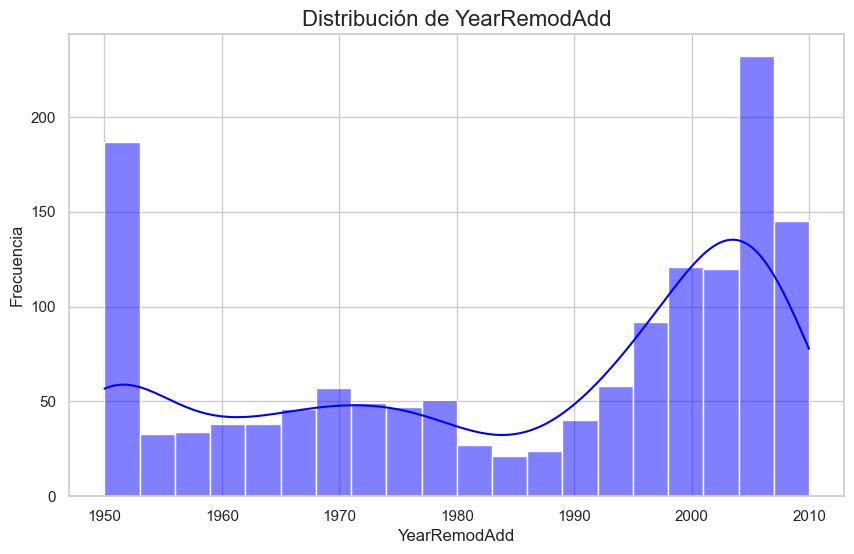

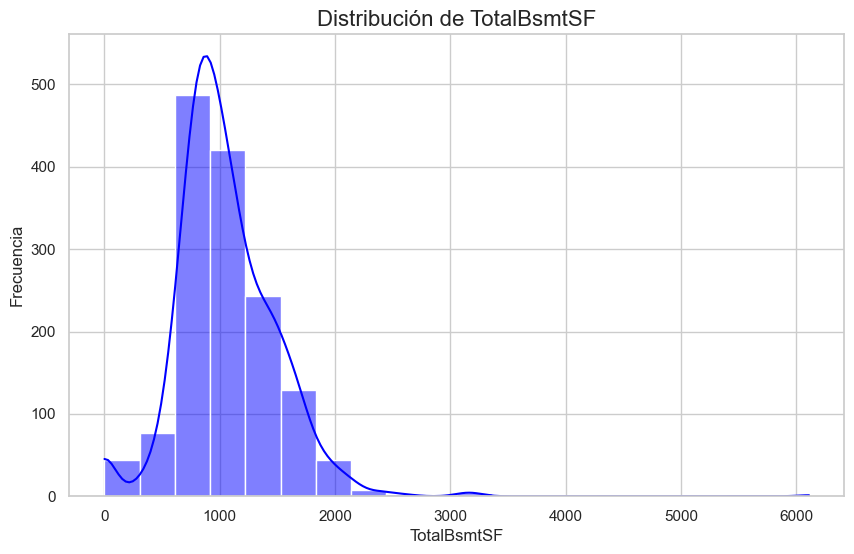

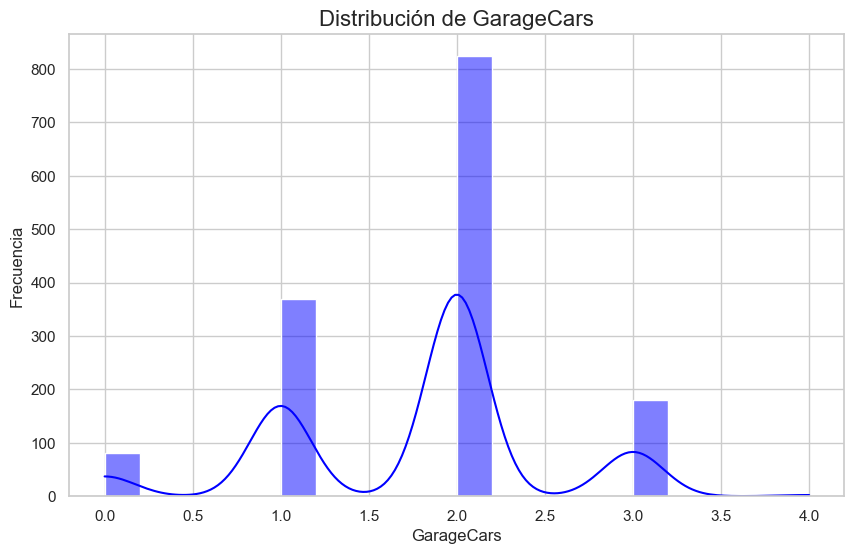

In [ ]:
# Lista de columnas numéricas (ajusta según tu DataFrame)
columns_to_plot = ['OverallQual', 'GrLivArea', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'GarageCars']

# Configura el estilo de los gráficos
sns.set(style="whitegrid")

# Iterar sobre cada columna en la lista
for col in columns_to_plot:
    plt.figure(figsize=(10, 6))  # Configura el tamaño de cada gráfico
    sns.histplot(df[col], kde=True, bins=20, color='blue')  # Crea el histograma con KDE
    plt.title(f'Distribución de {col}', fontsize=16)  # Título dinámico para cada columna
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.show()  # Muestra el gráfico

Vamos a usar RobustScaler, no me convencen las distribuciones para aplicar el standard.

In [81]:
# Definir las características numéricas y categóricas QUE ME PARECEN MEJOR PARA REVISAR, YA SE ME ACABA EL TIEMPO
numeric_features = ['OverallQual','GrLivArea','YearBuilt','YearRemodAdd','TotalBsmtSF','GarageCars']
categorical_features = ['MSZoning','Street','LotShape','Utilities','Neighborhood']

In [82]:
# Separar variables predictoras y objetivo
selected_features = numeric_features + categorical_features
X = df[selected_features]
y = df['SalePrice']

In [84]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [85]:
# Crear el preprocesador con OneHotEncoder para características categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # Mantiene las columnas numéricas sin cambios
)

In [86]:
# Aplicar el preprocesamiento al conjunto de entrenamiento y prueba
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [87]:
# Escalado de datos
scaler = RobustScaler(with_centering=False)
X_train_scaled = scaler.fit_transform(X_train_transformed)
X_test_scaled = scaler.transform(X_test_transformed)


# Parte 3: Modelos de Regresión
3. Regresión Lineal:

* Entrenamiento del modelo.
* Evaluación del rendimiento (MSE y R²).

In [ ]:
# Regresion lineal con 5 hyper parámetros
model = LinearRegression(
    fit_intercept= True,      # Si se debe calcular el intercepto
    #normalize = 'deprecated', # Normalizar los datos, opcion deprecada
    copy_X=True,              # Si se debe hacer una copia de X
    n_jobs=None,              # Numero de procesadores a utilizar. None es usar uno
    positive=False            # Si se deben forzar los coeficientes para que sea positivos
)
# El modelo tiene diferentes tipos de parámetros(?) o de funciones.
# fit es el entrenamiento (en standard scaler, one hor encoder o cualquier otro modelo que puedan transformar los datos es entrenamiento)
# Se deben notar que le pasamos las entradas y las salidas que deben tener, x es entrada, y es salida. Son entradas y salidas para el entrenamiento.
# El resultado es un modelo entrenado.
model.fit(X_train_scaled, y_train)

# Cuando el modelo ya fue entrenado, lo ponemos a predecir.
# Aqui solo le pasamos la entrada. La salida es el resultado a predecir.
y_pred = model.predict(X_test_scaled)

print("Coeficiente del modelo:", model.coef_)
print("Intercepto del modelo:",model.intercept_)

Coeficiente del modelo: [-1.89037172e+04  1.02180112e+04 -3.92968010e+02  1.25741730e+04
 -3.49549898e+03  1.20382550e+01 -1.20382550e+01  2.89115881e+03
  1.71859597e+04 -1.98188857e+04 -2.58232782e+02  2.07462090e+04
 -2.07462090e+04 -2.82665098e+04 -2.31782144e+04 -2.08912633e+04
  4.38834187e+03  1.80821226e+04 -7.04155413e+03  1.91211701e+04
 -1.43289426e+04 -1.34290251e+04  2.35735654e+03 -4.56614144e+03
 -1.19508304e+04 -9.51124457e+03 -2.43770690e+04 -1.48252449e+04
  4.36073615e+04  4.07977079e+04 -8.44612630e+03 -1.73999089e+04
 -9.01182912e+03 -1.10706293e+04 -1.57439615e+03  4.57014169e+04
  1.31167062e+04  3.26967459e+04  3.06776219e+04  2.82832649e+04
  8.78011728e+03  1.11599140e+04  9.61819000e+03  1.37312206e+04]
Intercepto del modelo: -997112.6018519455


In [ ]:
# Evaluación del modelo en conjunto de prueba
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Resultados en el conjunto de prueba:")
print(f"Error absoluto medio (MAE): {mae}")
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R²): {r2}")

Resultados en el conjunto de prueba:
Error absoluto medio (MAE): 21117.959138104845
Error cuadrático medio (MSE): 1117094584.7303092
Coeficiente de determinación (R²): 0.8399140763938461


In [93]:
# Entrenamiento del modelo KNN
knn = KNeighborsRegressor(n_neighbors=12)
knn.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred = knn.predict(X_test_scaled)

# Evaluación del modelo en conjunto de prueba
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Resultados en el conjunto de prueba:")
print(f"Error absoluto medio (MAE): {mae}")
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R²): {r2}")

Resultados en el conjunto de prueba:
Error absoluto medio (MAE): 20413.845509893454
Error cuadrático medio (MSE): 1168011470.4430492
Coeficiente de determinación (R²): 0.8326174009037928


# Comparación


| Metricas/Modelos                  | KNN              | Regresion lineal |
|-----------------------------------|------------------|------------------|
| Error absoluto medio (MAE)        | 20,413.85        | 21,117.96        |
| Error cuadrático medio (MSE)      | 1,168,011,470.44 | 1,117,094,584.73 |
| Coeficiente de determinación (R²) | 0.8326174009     | 0.8399140764     |


Si deseamos un mejor desempeño en explicar la variabilidad  la regresion Lineal es mejor.

Pero si deseamos predicciones más precisas, el KNN tiene menos errores.

Si nos basamos en penalizaciones, Regresión Linea es el indicado.


De tres opciones, si ponderamos todos, Regresion Lineal es el indicado.